# importing the libraries

In [1]:
import re
import os
import h5py
import itertools
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [2]:
in_dir = 'input'
out_dir = 'processed'
model_dir = 'model'

In [3]:
file_name = 'data.csv'
cleaned_fname =  'cdata.csv'
train_fname = 'train.csv'
test_fname = 'test.csv'

print('List of files and directories : ',os.listdir(in_dir))

List of files and directories :  ['data.csv', 'ndata.csv']


In [4]:
input_file_path = os.path.join(in_dir,file_name)
cleaned_file_path = os.path.join(out_dir,cleaned_fname)
train_file_path = os.path.join(out_dir,train_fname)
test_file_path = os.path.join(out_dir,test_fname)


In [5]:
print('Input data path : ',input_file_path,
      '\nClean data path : ',cleaned_file_path,
      '\nTrain-set path : ', train_file_path,
      '\nTest-set path : ', test_file_path,
)

Input data path :  input\data.csv 
Clean data path :  processed\cdata.csv 
Train-set path :  processed\train.csv 
Test-set path :  processed\test.csv


# data preprocessing

In [6]:
df_data = pd.read_csv(input_file_path)

In [7]:
df_data

,Destination_Port,Flow_Duration,Total_Fwd_Packets,Total_Backward_Packets,Total_Length_of_Fwd_Packets,Total_Length_of_Bwd_Packets,Fwd_Packet_Length_Max,Fwd_Packet_Length_Min,Fwd_Packet_Length_Mean,Fwd_Packet_Length_Std,...,min_seg_size_forward,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label
0,80,38308,1,1,6,6,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,389,479,11,5,172,326,79,0,15.636364,31.449238,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,88,1095,10,6,3150,3150,1575,0,315.000000,632.561635,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,389,15206,17,12,3452,6660,1313,0,203.058824,425.778474,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,88,1092,9,6,3150,3152,1575,0,350.000000,694.509719,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692698,53,32215,4,2,112,152,28,28,28.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
692699,53,324,2,2,84,362,42,42,42.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
692700,58030,82,2,1,31,6,31,0,15.500000,21.920310,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
692701,53,1048635,6,2,192,256,32,32,32.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [7]:
df_data = shuffle(df_data)

In [8]:
df_data.shape

(692703, 79)

In [9]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 692703 entries, 319844 to 261179
Data columns (total 79 columns):
Destination_Port               692703 non-null int64
Flow_Duration                  692703 non-null int64
Total_Fwd_Packets              692703 non-null int64
Total_Backward_Packets         692703 non-null int64
Total_Length_of_Fwd_Packets    692703 non-null int64
Total_Length_of_Bwd_Packets    692703 non-null int64
Fwd_Packet_Length_Max          692703 non-null int64
Fwd_Packet_Length_Min          692703 non-null int64
Fwd_Packet_Length_Mean         692703 non-null float64
Fwd_Packet_Length_Std          692703 non-null float64
Bwd_Packet_Length_Max          692703 non-null int64
Bwd_Packet_Length_Min          692703 non-null int64
Bwd_Packet_Length_Mean         692703 non-null float64
Bwd_Packet_Length_Std          692703 non-null float64
Flow_Bytes_Per_Sec             691695 non-null object
Flow_Packets_Per_Sec           692703 non-null object
Flow_IAT_Mean             

In [10]:
df_data.Label.value_counts()

BENIGN              440031
DoS Hulk            231073
DoS GoldenEye        10293
DoS slowloris         5796
DoS Slowhttptest      5499
Heartbleed              11
Name: Label, dtype: int64

In [11]:
type(df_data['Flow_Bytes_Per_Sec'][0])

str

In [13]:
def numeric(row):
    try:
        if np.isnan(row):
            return
        else:
            row = str(row)
            return float(re.sub("\D\.", "", row))
    except TypeError:
        row = str(row)
        return float(re.sub("\D\.", "", row))

In [14]:
df_data['Flow_Bytes_Per_Sec'] = df_data['Flow_Bytes_Per_Sec'].apply(numeric)
df_data['Flow_Packets_Per_Sec'] = df_data['Flow_Packets_Per_Sec'].apply(numeric)

In [15]:
df_data.isna().sum()

Destination_Port               0
Flow_Duration                  0
Total_Fwd_Packets              0
Total_Backward_Packets         0
Total_Length_of_Fwd_Packets    0
                              ..
Idle_Mean                      0
Idle_Std                       0
Idle_Max                       0
Idle_Min                       0
Label                          0
Length: 79, dtype: int64

In [16]:
df_data.Flow_Bytes_Per_Sec.fillna(value=df_data.Flow_Bytes_Per_Sec.median(), inplace=True)

In [17]:
df_data.isna().sum()

Destination_Port               0
Flow_Duration                  0
Total_Fwd_Packets              0
Total_Backward_Packets         0
Total_Length_of_Fwd_Packets    0
                              ..
Idle_Mean                      0
Idle_Std                       0
Idle_Max                       0
Idle_Min                       0
Label                          0
Length: 79, dtype: int64

In [18]:
df_data.head()

,Destination_Port,Flow_Duration,Total_Fwd_Packets,Total_Backward_Packets,Total_Length_of_Fwd_Packets,Total_Length_of_Bwd_Packets,Fwd_Packet_Length_Max,Fwd_Packet_Length_Min,Fwd_Packet_Length_Mean,Fwd_Packet_Length_Std,...,min_seg_size_forward,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label
319844,80,989,4,0,0,0,0,0,0.000000,0.000000,...,32,0.0000,0.000,0,0,0.0,0.000000,0,0,DoS Hulk
566224,53,30906,2,2,68,150,34,34,34.000000,0.000000,...,20,0.0000,0.000,0,0,0.0,0.000000,0,0,BENIGN
98884,80,98474725,8,7,724,11595,350,0,90.500000,160.188282,...,20,12975.0000,0.000,12975,12975,98100000.0,0.000000,98100000,98100000,DoS Hulk
119223,80,85008027,7,5,316,11595,316,0,45.142857,119.436774,...,32,5.0000,0.000,5,5,84900000.0,0.000000,84900000,84900000,DoS Hulk
481350,443,116899412,39,37,713,34033,324,0,18.282051,64.392280,...,32,156886.3636,422270.239,1430079,29419,10000000.0,7300.086169,10000000,9996097,BENIGN


In [19]:
def nullAnalysis(df):
    tab_info=pd.DataFrame(df.dtypes).T.rename(index={0:'column type'})

    tab_info=tab_info.append(pd.DataFrame(df.isnull().sum()).T.rename(index={0:'null values (nb)'}))
    tab_info=tab_info.append(pd.DataFrame(df.isnull().sum()/df.shape[0]*100).T.rename(index={0:'null values (%)'}))
    return tab_info

In [20]:
nullAnalysis(df_data)

,Destination_Port,Flow_Duration,Total_Fwd_Packets,Total_Backward_Packets,Total_Length_of_Fwd_Packets,Total_Length_of_Bwd_Packets,Fwd_Packet_Length_Max,Fwd_Packet_Length_Min,Fwd_Packet_Length_Mean,Fwd_Packet_Length_Std,...,min_seg_size_forward,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label
column type,int64,int64,int64,int64,int64,int64,int64,int64,float64,float64,...,int64,float64,float64,int64,int64,float64,float64,int64,int64,object
null values (nb),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
null values (%),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
df_data.Label.unique()

array(['DoS Hulk', 'BENIGN', 'DoS Slowhttptest', 'DoS GoldenEye',
       'DoS slowloris', 'Heartbleed'], dtype=object)

In [22]:
df_data.Label.value_counts()

BENIGN              440031
DoS Hulk            231073
DoS GoldenEye        10293
DoS slowloris         5796
DoS Slowhttptest      5499
Heartbleed              11
Name: Label, dtype: int64

In [23]:
df_data.Label.replace(inplace=True, to_replace= df_data.Label.unique(), value=np.arange(len(df_data.Label.unique())))

In [24]:
df_data.Label.value_counts()

1    440031
0    231073
3     10293
4      5796
2      5499
5        11
Name: Label, dtype: int64

In [25]:
np.isnan(df_data.values.any())

False

In [26]:
val = df_data[df_data.values >= np.finfo(np.float64).max]
val.index

Int64Index([119657, 226587,  28386,  28386, 274724, 314210, 312966, 314159,
            305377, 288859,
            ...
            344844, 133283, 416975, 416975,  88367, 115332, 312441, 171248,
             14379,  14379],
           dtype='int64', length=1586)

In [27]:
df_data.drop(index=val.index, inplace=True)

In [28]:
df_data.shape

(691406, 79)

In [29]:
df_data.to_csv(cleaned_file_path,index=False)

# SVM Model

In [30]:
df_data = pd.read_csv(cleaned_file_path)

In [31]:
y = df_data['Label']
x = df_data.drop('Label',axis = 1)

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.25, random_state=42)

In [33]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(518554, 78) (518554,) (172852, 78) (172852,)


In [34]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [35]:
model_svm = SVC()

In [36]:
model_svm.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [37]:
predictions_svm = model_svm.predict(x_test)

In [38]:
acc_svm = accuracy_score(y_true=y_test, y_pred= predictions_svm)
print("Overall accuracy of SVM model using test-set is : %f" %(acc_svm*100))

Overall accuracy of SVM model using test-set is : 93.307569


In [39]:
print(classification_report(y_test,predictions_svm))

              precision    recall  f1-score   support

           0       0.96      0.86      0.91     57612
           1       0.92      0.98      0.95    109866
           2       0.94      0.76      0.84      1378
           3       0.98      0.85      0.91      2550
           4       0.78      0.51      0.61      1444
           5       0.00      0.00      0.00         2

    accuracy                           0.93    172852
   macro avg       0.76      0.66      0.70    172852
weighted avg       0.93      0.93      0.93    172852



In [40]:
import pickle
filename='model/svm_model.sav'
pickle.dump(model_svm,open(filename, 'wb'))

In [41]:
# print(confusion_matrix(y_test,predictions_svm))

In [42]:
def plot_confusion_matrix(cm, classes,title='Confusion matrix'):
    plt.figure(figsize=(10,5))
    plt.imshow(cm, interpolation='nearest', cmap='YlGnBu')
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    
    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

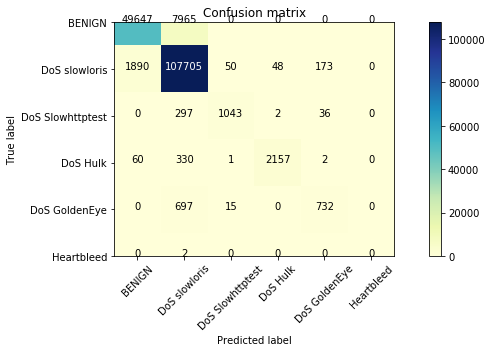

In [43]:
labels = [
    'BENIGN',
    'DoS slowloris',
    'DoS Slowhttptest',
    'DoS Hulk',
    'DoS GoldenEye',
    'Heartbleed'
]

cm = confusion_matrix(y_pred=predictions_svm, y_true=y_test)
plot_confusion_matrix(cm,classes=labels)

# Thank You